In [51]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import math

In [52]:
#Reading the csv file
data = pd.read_csv('titanic.csv')

In [53]:
#First 5 enteries
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
data.info() #We use this to understand the data better

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total number of missing values:  866


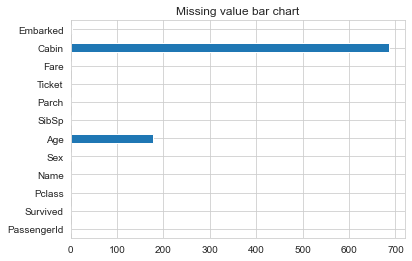

In [56]:
#For data cleaning
print(data.isna().sum())
print("Total number of missing values: ", data.isna().sum().sum())
data.isna().sum().plot(kind="barh", title="Missing value bar chart")

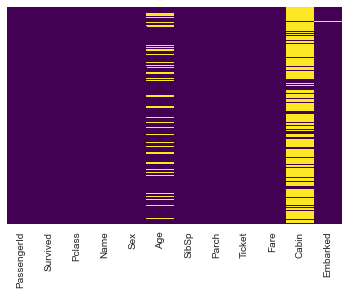

In [57]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
#delete cabin column
del data["Cabin"]
med = round(data["Age"].median(), 0)
data["Age"].fillna(value=med, inplace=True)
data["Age"] = data.Age.apply(math.ceil)
data["Embarked"] = data.Embarked.fillna(method='ffill')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Total number of missing values:  0


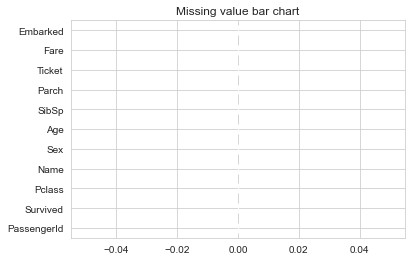

In [59]:
print(data.isna().sum())
print("Total number of missing values: ", data.isna().sum().sum())
data.isna().sum().plot(kind="barh", title="Missing value bar chart")

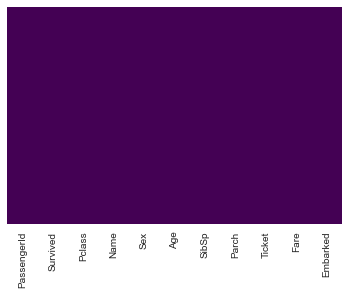

In [60]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
def iqr(data_col):
    q1 = data_col.quantile(0.25)
    q3 = data_col.quantile(0.75)
    iqr = q3 - q1
    return iqr
    
def no_of_bins(data_col):
    IQR = iqr(data_col)
    Max = data_col.max()
    Min = data_col.min()
    n = len(data_col)
    binwidth = round( (2*IQR)/(n**(1/3)) , 0 )
    n_bins =(Max-Min)/binwidth
    return int(n_bins)

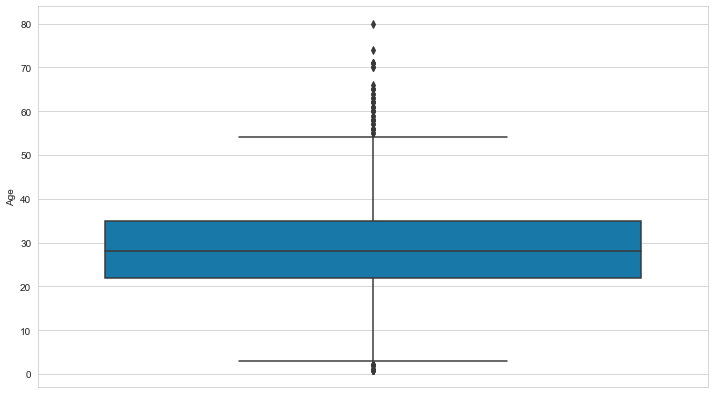

In [62]:
#Data Cleaning
#We want to fill in missing age data instead of just dropping the
#missing age data rows. One way to do this is by filling in the 
#average age by passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(y='Age',data=data,palette='winter')
#Outliers present

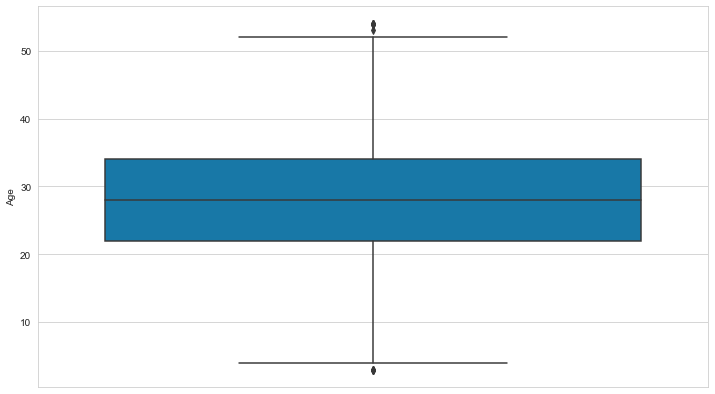

In [63]:
#Removing outliers in age column
age_iqr = iqr(data["Age"])
age_q1 = data["Age"].quantile(0.25)
age_q3 = data["Age"].quantile(0.75)
data["Age"] = data.loc[(data["Age"]<= age_q3 + 1.5*age_iqr) & (data["Age"] >= age_q1 - 1.5*age_iqr), ["Age"]]
plt.figure(figsize=(12, 7))
sns.boxplot(y='Age',data=data,palette='winter')

#filtered_age.hist(bins=n_bins)

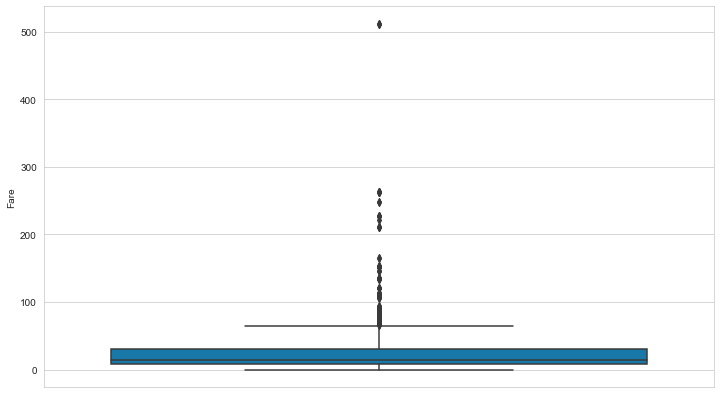

In [64]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='Fare',data=data,palette='winter')

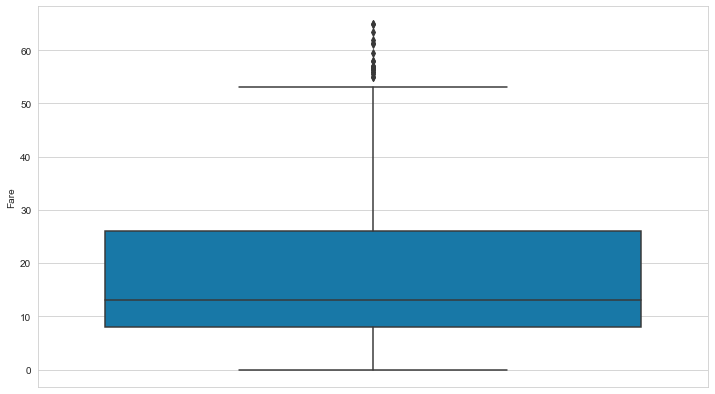

In [65]:
#Analyzing fare
fare_iqr = iqr(data["Fare"])
fare_q1 = data["Fare"].quantile(0.25)
fare_q3 = data["Fare"].quantile(0.75)
data["Fare"] = data.loc[(data["Fare"]<= fare_q3 + 1.5*fare_iqr) & (data["Fare"]>= fare_q1 - 1.5*fare_iqr), ["Fare"]]
plt.figure(figsize=(12, 7))
sns.boxplot(y='Fare',data=data,palette='winter')

0    549
1    342
Name: Survived, dtype: int64


([<matplotlib.patches.Wedge at 0x121f9d910>,
 [Text(-0.39257493509945834, 1.0275626113924428, 'Not survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')])

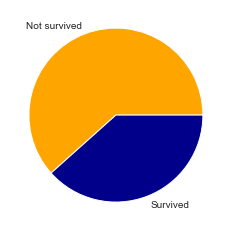

In [66]:
print(data["Survived"].value_counts())
survival = [list(data["Survived"].value_counts())]
label = ["Not survived","Survived"]
color = ["orange","darkblue"]
plt.pie(np.array(survival).ravel(), labels=label, colors=color)

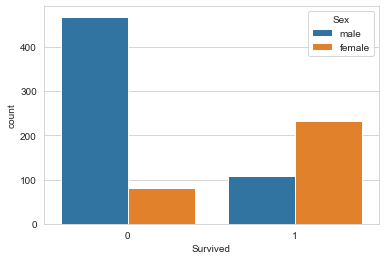

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

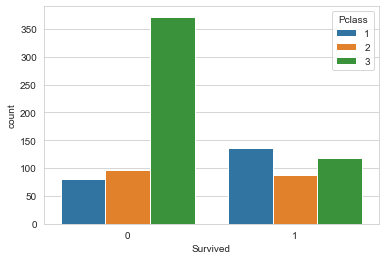

In [68]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

S    644
C    169
Q     78
Name: Embarked, dtype: int64


([<matplotlib.patches.Wedge at 0x121a07460>,
 [Text(-0.7085508191518027, 0.8414010557868996, 'Southampton'),
  Text(0.45342565843861055, -1.0022001657700486, 'Cherbourg'),
  Text(1.0586612720907702, -0.2987244733448405, 'Queenstown')])

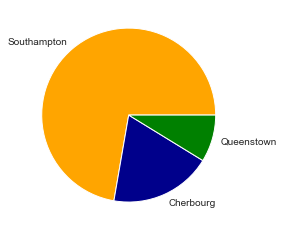

In [69]:
print(data["Embarked"].value_counts())
places = list(data["Embarked"].value_counts())
label = ["Southampton","Cherbourg", "Queenstown"]
color = ["orange","darkblue","green"]
plt.pie(np.array(places).ravel(), labels=label, colors=color)

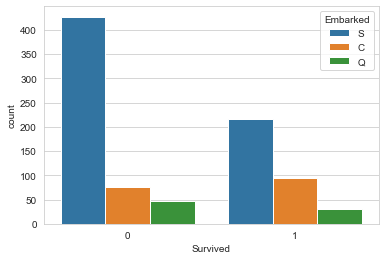

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=data)

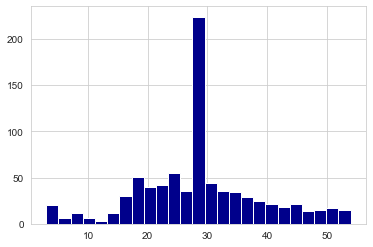

In [71]:
n_bins = no_of_bins(data["Age"])
data['Age'].hist(bins=n_bins,color='darkblue')

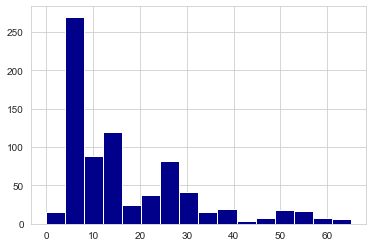

In [72]:
n_bins = no_of_bins(data["Fare"])
data['Fare'].hist(bins=n_bins,color='darkblue')

In [73]:
mean_age = data["Age"].mean()
std_age = data["Age"].std()

def Norm_age(x):
    z = (x - mean_age)/std_age
    return z  

mean_fare = data["Fare"].mean()
std_fare = data["Fare"].std()

def Norm_fare(x):
    z = (x - mean_fare)/std_fare
    return z 

In [74]:
Normalised_age = data['Age'].apply(Norm_age)
Normalised_fare = data['Fare'].apply(Norm_fare)

In [75]:
print("After Normalizing Age :\nMean:",Normalised_age.mean(),"\nStandard Deviation:",Normalised_age.std())

After Normalizing Age :
Mean: 2.7149999420378827e-16 
Standard Deviation: 1.0


In [76]:
print("After Normalizing Fare :\nMean:",Normalised_fare.mean(),"\nStandard Deviation:",Normalised_fare.std())

After Normalizing Fare :
Mean: 8.484968999812648e-16 
Standard Deviation: 1.0


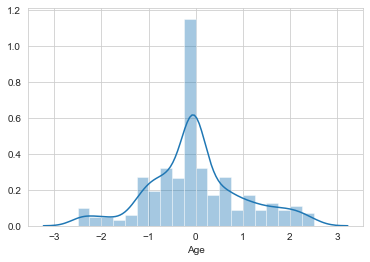

In [77]:
sns.distplot(Normalised_age)

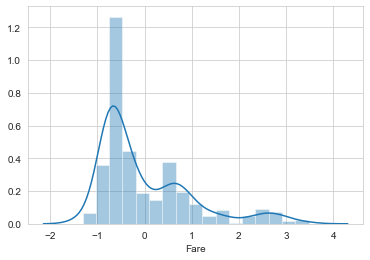

In [78]:
sns.distplot(Normalised_fare)

In [79]:
#Ho: Class of people did not have an effect on their survival rate
#Ha: Class of people affected their survival rate

In [80]:
p_class_1_Sample = np.array([np.mean(data[data["Pclass"]==1].sample(30)["Survived"].values) for i in range(100)])
p_class_3_Sample = np.array([np.mean(data[data["Pclass"]==3].sample(30)["Survived"].values) for i in range(100)])

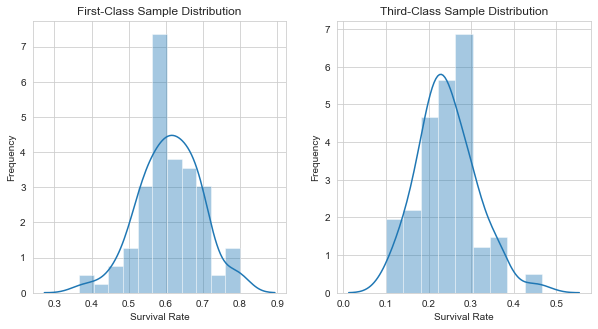

In [81]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(p_class_1_Sample)
plt.title("First-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(p_class_3_Sample)
plt.title("Third-Class Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [82]:
change_in_surival_rate=np.mean(p_class_1_Sample)-np.mean(p_class_3_Sample)
std1=np.std(p_class_1_Sample)
std3=np.std(p_class_3_Sample)
std=np.sqrt((std1**2)/len(p_class_1_Sample)  +  (std3**2)/len(p_class_3_Sample))

In [83]:
z_score=change_in_surival_rate/std
z_score

34.08626051120743

In [84]:
p_values = scipy.stats.norm.sf(abs(z_score))*2
p_values

1.1787932295011167e-254

In [85]:
if p_values<=0.05:
    print("Ho is rejected and accept Ha")
else:
    print("Ho is plausible")

Ho is rejected and accept Ha


In [86]:
#Ho: Survival rate of women is greater than that of men
#Ha: Survival rate of women is lesser than that of men

In [87]:
male_sample = np.array([np.mean(data[data["Sex"]=="male"].sample(30)["Survived"].values) for i in range(100)])
female_sample = np.array([np.mean(data[data["Sex"]=="female"].sample(30)["Survived"].values) for i in range(100)])

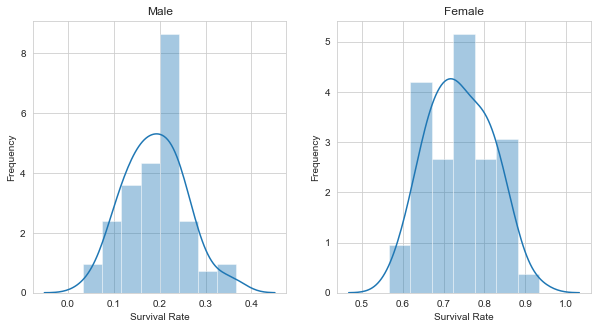

In [88]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(male_sample)
plt.title("Male")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(female_sample)
plt.title("Female")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [89]:
change_in_surival_rate1=np.mean(male_sample)-np.mean(female_sample)
stdm=np.std(male_sample)
stdf=np.std(female_sample)
stdd=np.sqrt((stdm**2)/len(male_sample)  +  (stdf**2)/len(female_sample))

In [90]:
z_score1=change_in_surival_rate1/stdd
z_score1

-53.68752768113968

In [91]:
p_values1 = scipy.stats.norm.sf(abs(z_score1))*2
p_values1

0.0

In [92]:
#Finding correlation between different numerical attributes
correlation=data.corr()

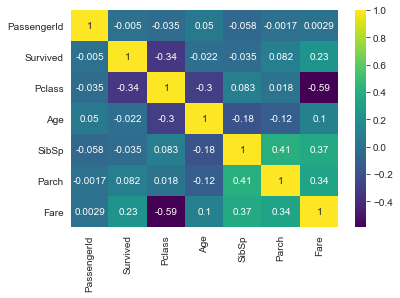

In [93]:
sns.heatmap(correlation,cmap='viridis',annot=True)